# Importation des bibliotheque

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.compat import lzip
import statsmodels.stats.weightstats

# importation des donnees

In [2]:
df= pd.read_csv('diam.csv')
# Afficher les premières lignes pour vérifier si les données sont chargées correctement
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [3]:
#afficher les colonnes
print(df.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


# Separation des variables qualitatifs des variables quantitatifs

In [4]:
# data c'est la matrice des variables quantitatifs
data=df[['carat', 'depth','table','x','y','z','price']]
qualitatifs=df[['cut','color','clarity']]

# Preparation des donnees

In [5]:
#la taille de la dataSet
data.shape

(53940, 7)

In [6]:
#valeurs manquantes
data.isna().sum()

carat    0
depth    0
table    0
x        0
y        0
z        0
price    0
dtype: int64

In [7]:
#Showing how many duplicated rows for the whole dataset
data.duplicated().sum()

208

In [8]:
data=data.drop_duplicates()

In [9]:
data.shape

(53732, 7)

In [10]:
# Compter le nombre de lignes où x, y et z sont égaux à zéro
zero_values = ((data['x'] == 0) & (data['y'] == 0) & (data['z'] == 0)).sum()

print(f"Il y a {zero_values} lignes avec des valeurs égales à zéro pour x, y et z.")

Il y a 6 lignes avec des valeurs égales à zéro pour x, y et z.


In [11]:
# Filtrer les lignes où au moins une des colonnes 'carat', 'depth', 'table', 'price', 'x', 'y' ou 'z' est égale à zéro
data = data[~(data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']] == 0).any(axis=1)]

# Vérifier la nouvelle taille du DataFrame après suppression des lignes
print(f"Taille du DataFrame après suppression des lignes : {data.shape}")

Taille du DataFrame après suppression des lignes : (53713, 7)


In [12]:
# Compter le nombre de lignes où x, y et z sont égaux à zéro
zero_values = ((data['x'] == 0) & (data['y'] == 0) & (data['z'] == 0)).sum()

print(f"Il y a {zero_values} lignes avec des valeurs égales à zéro pour x, y et z.")

Il y a 0 lignes avec des valeurs égales à zéro pour x, y et z.


In [13]:
data.describe()

,carat,depth,table,x,y,z,price
count,53713.000000,53713.000000,53713.000000,53713.000000,53713.000000,53713.000000,53713.000000
mean,0.798069,61.748020,57.458613,5.733058,5.736384,3.540866,3934.837116
std,0.473177,1.430221,2.233939,1.118377,1.139250,0.701899,3986.780893
min,0.200000,43.000000,43.000000,3.730000,3.680000,1.070000,326.000000
25%,0.400000,61.000000,56.000000,4.720000,4.720000,2.910000,954.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2405.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5330.000000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


# Normalisation des donnes

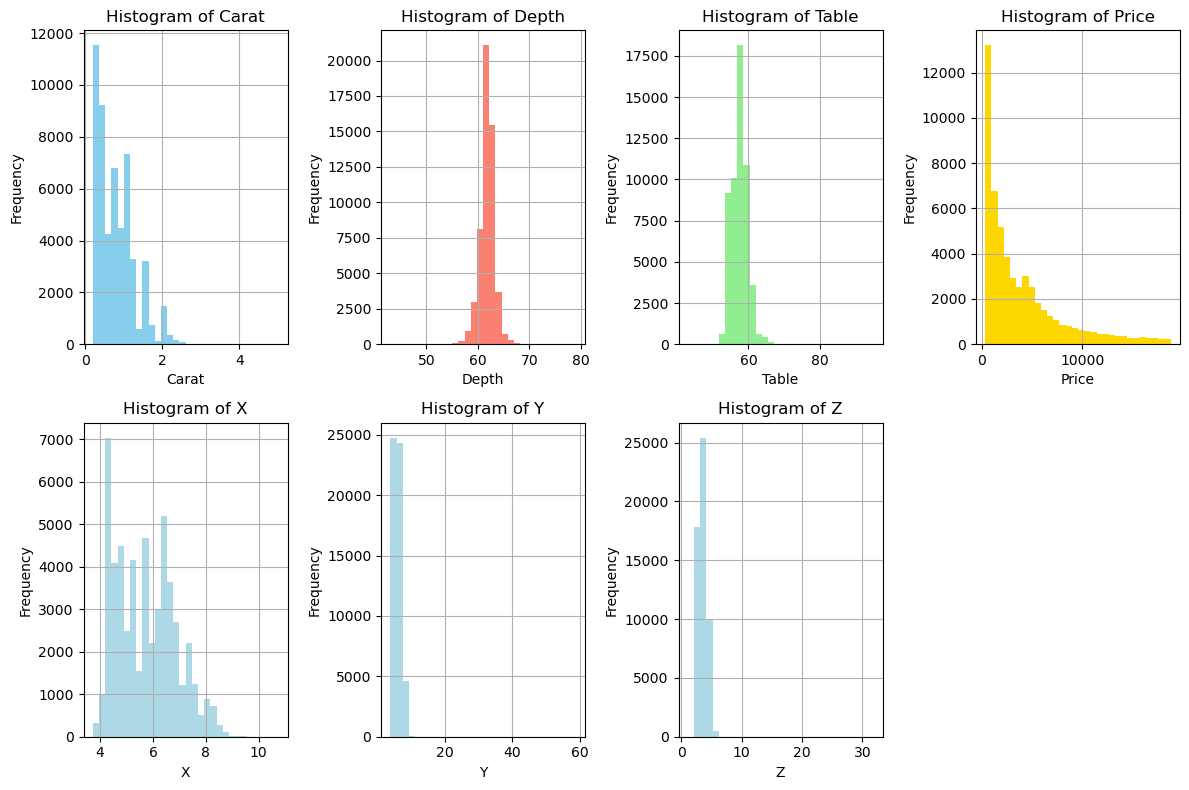

In [14]:

# Histogramme pour chaque variable
plt.figure(figsize=(12, 8))

# Histogramme pour Carat
plt.subplot(2, 4, 1)
plt.hist(data['carat'], bins=30, color='skyblue')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.title('Histogram of Carat')
plt.grid(True)

# Histogramme pour Depth
plt.subplot(2, 4, 2)
plt.hist(data['depth'], bins=30, color='salmon')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.title('Histogram of Depth')
plt.grid(True)

# Histogramme pour Table
plt.subplot(2, 4, 3)
plt.hist(data['table'], bins=30, color='lightgreen')
plt.xlabel('Table')
plt.ylabel('Frequency')
plt.title('Histogram of Table')
plt.grid(True)

# Histogramme pour Price
plt.subplot(2, 4, 4)
plt.hist(data['price'], bins=30, color='gold')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.grid(True)

# Histogramme pour les dimensions X, Y, Z
dimensions = ['x', 'y', 'z']
for i, dim in enumerate(dimensions):
    plt.subplot(2, 4, i+5)
    plt.hist(data[dim], bins=30, color='lightblue')
    plt.xlabel(dim.upper())
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {dim.upper()}')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
# Sélectionner les colonnes à normaliser (toutes sauf 'price')
columns_to_normalize = ['carat', 'depth', 'table', 'x', 'y', 'z','price']
# Créer un objet StandardScaler
scaler = StandardScaler()

# Normaliser les données sauf la colonne 'price'
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Afficher les premières lignes du DataFrame pour vérification
print(data.head())

      carat     depth     table         x         y         z     price
0 -1.200554 -0.173415 -1.100584 -1.594341 -1.541716 -1.582673 -0.905209
1 -1.242822 -1.362054  1.585281 -1.647991 -1.664605 -1.753640 -0.905209
2 -1.200554 -3.389733  3.375857 -1.504925 -1.462716 -1.753640 -0.904958
3 -1.073750  0.455864  0.242348 -1.370801 -1.322272 -1.297729 -0.903203
4 -1.031482  1.085143  0.242348 -1.245619 -1.216938 -1.126763 -0.902952


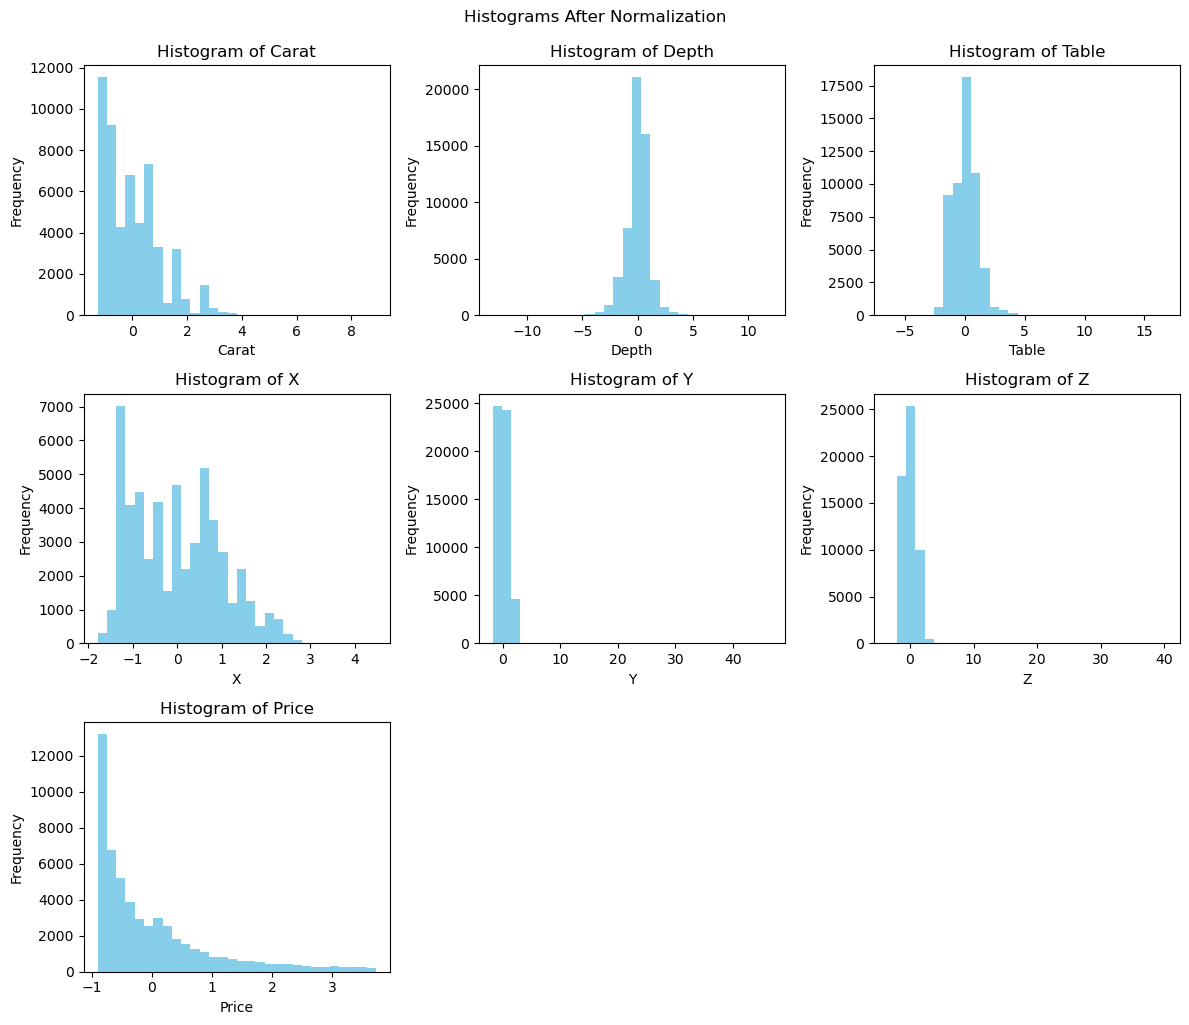

In [16]:
# Histograms after normalization
plt.figure(figsize=(12, 10))

for i, column in enumerate(data.columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[column], bins=30, color='skyblue')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column.capitalize()}')

plt.tight_layout()
plt.suptitle('Histograms After Normalization', y=1.02)
plt.show()

# Etude de correalation

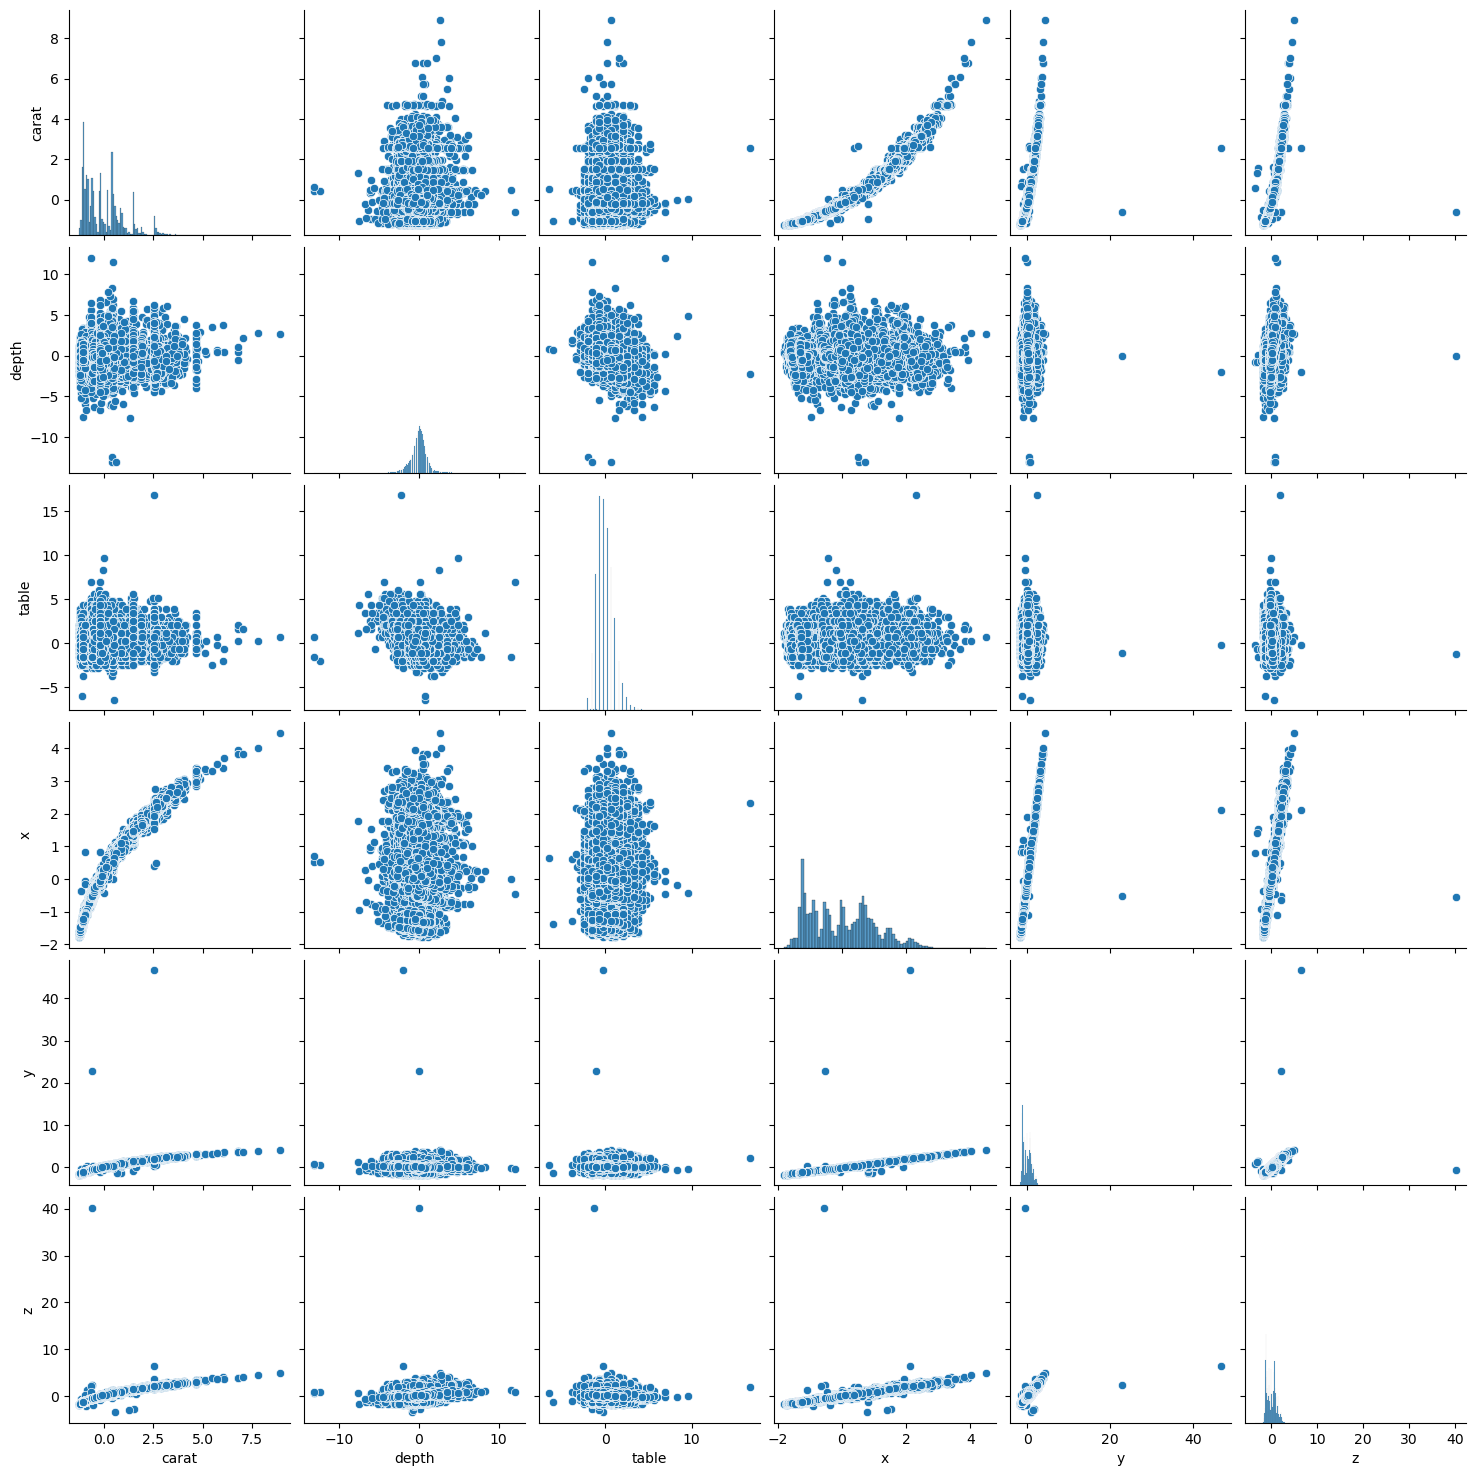

In [17]:
# Liste des noms des variables explicatives (excluant la variable cible 'price')
variables_explicatives = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Créer la matrice de nuages de points en spécifiant les variables explicatives et la variable cible 'price'
sns.pairplot(data[variables_explicatives])
plt.show()

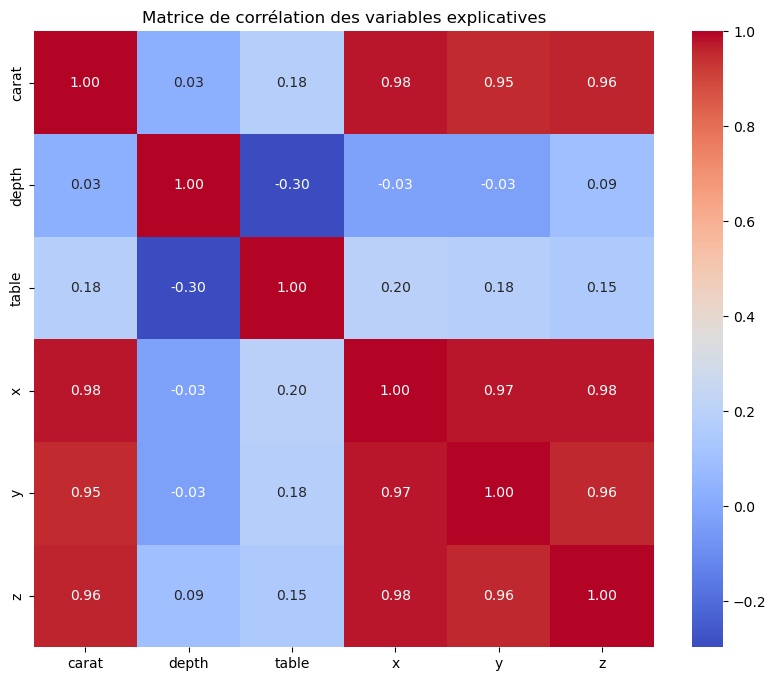

In [18]:
# Liste des noms des variables explicatives (excluant la variable cible 'price')
variables_explicatives = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Matrice de corrélation pour les variables explicatives
correlation_matrix = data[variables_explicatives].corr()

# Affichage de la matrice de corrélation des variables explicatives sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des variables explicatives')
plt.show()

In [19]:
# Liste des noms des variables explicatives (excluant la variable cible 'price')
variables_explicatives = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Matrice de corrélation pour les variables explicatives
correlation_matrix = data[variables_explicatives].corr()

# Affichage de la matrice de corrélation des variables explicatives sous forme de tableau
print("Matrice de corrélation des variables explicatives :")
print(correlation_matrix)

Matrice de corrélation des variables explicatives :
          carat     depth     table         x         y         z
carat  1.000000  0.028039  0.180927  0.977848  0.953937  0.960996
depth  0.028039  1.000000 -0.297512 -0.025095 -0.029137  0.094885
table  0.180927 -0.297512  1.000000  0.195268  0.183622  0.151473
x      0.977848 -0.025095  0.195268  1.000000  0.974784  0.975346
y      0.953937 -0.029137  0.183622  0.974784  1.000000  0.956559
z      0.960996  0.094885  0.151473  0.975346  0.956559  1.000000


In [20]:
# Liste des noms des variables explicatives (excluant la variable cible 'price')
variables_explicatives = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Calcul de la corrélation entre chaque variable explicative et la variable cible 'price'
correlations_with_price = data[variables_explicatives].corrwith(data['price'])

# Affichage des corrélations avec la variable cible 'price'
print("Corrélations avec la variable 'price':")
print(correlations_with_price)

Corrélations avec la variable 'price':
carat    0.921500
depth   -0.011036
table    0.126472
x        0.887096
y        0.867615
z        0.867961
dtype: float64


# Regression multiple

In [21]:
#split data into feature and target
X = data[['carat', 'depth','table','x','y','z']]
y = data['price']

## 1 er regression

In [22]:
#split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Create a DataFrame for training data
data1= pd.DataFrame(data=X_train, columns=['carat', 'depth', 'table', 'x', 'y', 'z'])

# Add the target variable 'price' to the DataFrame
data1['price'] = y_train

# Create a DataFrame for training data
data2= pd.DataFrame(data=X_test, columns=['carat', 'depth', 'table', 'x', 'y', 'z'])

# Add the target variable 'price' to the DataFrame
data2['price'] = y_test

In [24]:
#entrainement de model
model = smf.ols("price ~ carat + depth + table + x + y + z", data=data1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 4.408e+04
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:05:13   Log-Likelihood:                -18865.
No. Observations:               42970   AIC:                         3.774e+04
Df Residuals:                   42963   BIC:                         3.780e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001      0.002      0.073      0.9

## 2eme regression sans  l'intercept 

In [25]:
#entrainement de model
model = smf.ols("price ~ carat + depth + table + x + y + z-1", data=data1)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                          4.408e+04
Date:                Tue, 09 Jan 2024   Prob (F-statistic):                        0.00
Time:                        11:05:14   Log-Likelihood:                         -18865.
No. Observations:               42970   AIC:                                  3.774e+04
Df Residuals:                   42964   BIC:                                  3.779e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

##  3 eme regression sans intercept et z

In [26]:
#entrainement de model
model = smf.ols("price ~ carat + depth + table + x + y -1", data=data1)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                          5.290e+04
Date:                Tue, 09 Jan 2024   Prob (F-statistic):                        0.00
Time:                        11:05:14   Log-Likelihood:                         -18865.
No. Observations:               42970   AIC:                                  3.774e+04
Df Residuals:                   42965   BIC:                                  3.778e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

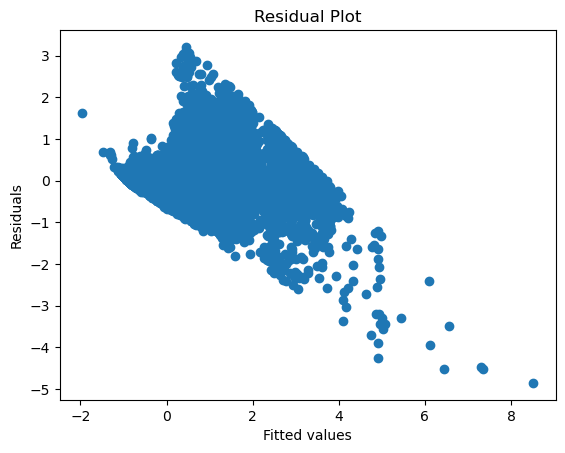

In [27]:
# Create a residual plot
residuals =results.resid
plt.scatter(results.fittedvalues, residuals)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In [28]:
# Obtenir les leviers
leviers = results.get_influence().hat_matrix_diag

# Définir un seuil pour les leviers élevés
seuil_leviers = 2 / len(data1)

# Obtenir les indices des observations avec des leviers élevés
indices_leviers_eleves = [i for i, levier in enumerate(leviers) if levier > seuil_leviers]

# Réinitialiser les indices du DataFrame
data_reset_index = data.reset_index(drop=True)

# Supprimer les observations avec des leviers élevés du dataset
data_without_high_leviers = data_reset_index.drop(indices_leviers_eleves)

# Réajuster le modèle sur le nouveau dataset
model_without_high_leviers = smf.ols("price ~ carat + depth + table + x + y -1", data=data_without_high_leviers)
results_without_high_leviers = model_without_high_leviers.fit()

In [29]:
print(leviers)

[6.23713881e-05 3.77938240e-05 8.29478127e-05 ... 6.51590730e-05
 5.40184819e-05 5.87110777e-05]


In [30]:
print(len(leviers))

42970


In [31]:
print(seuil_leviers )

4.6544100535257155e-05


In [32]:

# Afficher le nouveau dataset sans les leviers élevés
print("Nouveau dataset sans leviers élevés:")
print(data_without_high_leviers)

# Afficher le résumé du nouveau modèle
print("Résumé du modèle sans leviers élevés:")
print(results_without_high_leviers.summary())

Nouveau dataset sans leviers élevés:
          carat     depth     table         x         y         z     price
1     -1.242822 -1.362054  1.585281 -1.647991 -1.664605 -1.753640 -0.905209
6     -1.179420  0.385944 -0.205296 -1.594341 -1.541716 -1.525685 -0.902701
14    -1.263956 -1.082375  2.032925 -1.737407 -1.743605 -1.810629 -0.900443
18    -1.052616  1.434743 -0.652940 -1.343976 -1.295938 -1.183752 -0.898938
22    -1.200554 -0.523015 -0.205296 -1.603283 -1.559272 -1.611168 -0.898437
...         ...       ...       ...       ...       ...       ...       ...
53708 -0.164991 -0.662855 -0.205296  0.015148  0.020729 -0.058223 -0.295438
53709 -0.164991  0.945304 -1.100584 -0.038501  0.011952  0.098496 -0.295438
53710 -0.207259  0.735544  1.137637 -0.065326 -0.049493  0.027260 -0.295438
53711  0.130884 -0.523015  0.242348  0.372813  0.336730  0.283710 -0.295438
53712 -0.101589  0.316024 -1.100584  0.086681  0.117285  0.141238 -0.295438

[25132 rows x 7 columns]
Résumé du modèle sans lev

In [33]:
print(len(data_without_high_leviers))
print(len(data1))

25132
42970


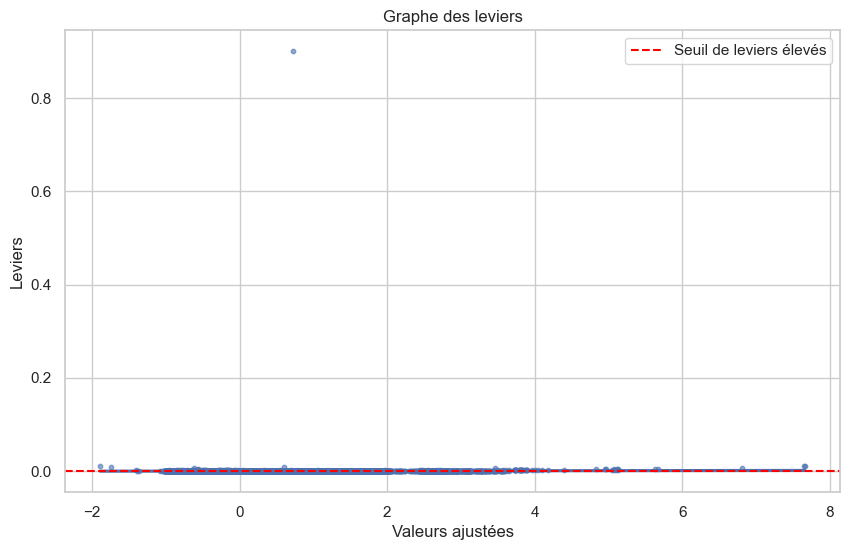

In [34]:
# Tracer le graphe des leviers
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x=results_without_high_leviers.fittedvalues, y=results_without_high_leviers.get_influence().hat_matrix_diag, ci=None, scatter_kws={"s": 10, "alpha": 0.6})
plt.axhline(y=seuil_leviers, color='red', linestyle='--', label='Seuil de leviers élevés')
plt.title('Graphe des leviers')
plt.xlabel('Valeurs ajustées')
plt.ylabel('Leviers')
plt.legend()
plt.show()

## Regression sans intercept sans z et levier 

In [35]:
model = smf.ols("price ~ carat + depth + table + x + y -1", data=data_without_high_leviers)
results = model.fit()

In [36]:
# Obtain predictions on the same dataset
predictions = results.predict(data_without_high_leviers)

# Create a DataFrame with actual prices and predicted prices
comparison_df = pd.DataFrame({'Actual Price': data_without_high_leviers['price'], 'Predicted Price': predictions})

# Print the comparison DataFrame
print(comparison_df)

       Actual Price  Predicted Price
1         -0.905209        -0.935455
6         -0.902701        -0.897141
14        -0.900443        -0.963795
18        -0.898938        -0.892784
22        -0.898437        -0.858737
...             ...              ...
53708     -0.295438        -0.184948
53709     -0.295438        -0.222229
53710     -0.295438        -0.374986
53711     -0.295438         0.021959
53712     -0.295438        -0.150949

[25132 rows x 2 columns]


In [37]:
# Calculate the error (residuals)
residuals = data_without_high_leviers['price'] - predictions

# Calculate Mean Absolute Error (MAE) as an example
mae = abs(residuals).mean()

# Print the MAE
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 0.18813736432144557


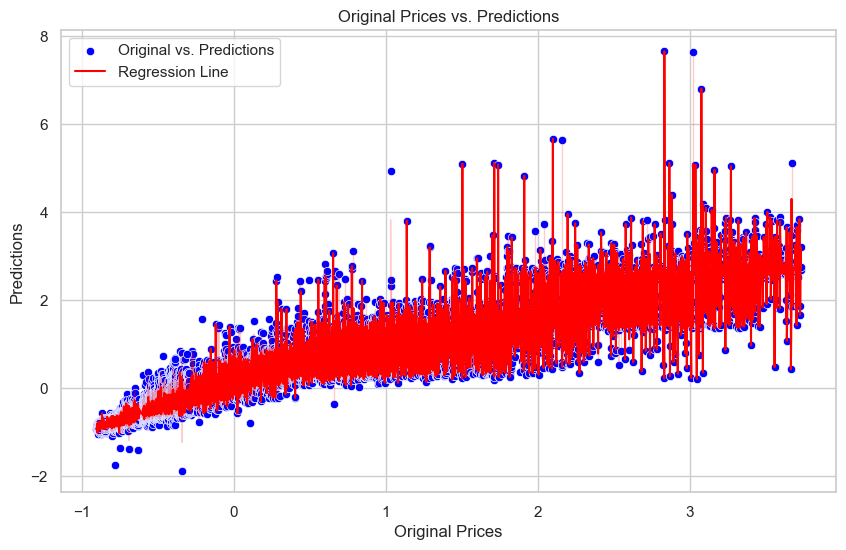

In [38]:
# Create a scatter plot with the original prices and predictions
plt.figure(figsize=(10, 6))

# Plotting the scatter plot
sns.scatterplot(x=data_without_high_leviers['price'], y=predictions, color='blue', label='Original vs. Predictions')

# Plotting the regression line in red
sns.lineplot(x=data_without_high_leviers['price'], y=predictions, color='red', label='Regression Line')

plt.title('Original Prices vs. Predictions')
plt.xlabel('Original Prices')
plt.ylabel('Predictions')

plt.legend()
plt.show()

## test de fisher

In [39]:
from statsmodels.stats.anova import anova_lm

# Effectuer le test de Fisher global
anova_results = anova_lm(results_without_high_leviers, results)
print(anova_results)

   df_resid          ssr  df_diff  ss_diff   F  Pr(>F)
0   25127.0  2795.986633      0.0      NaN NaN     NaN
1   25127.0  2795.986633     -0.0     -0.0 NaN     NaN


# Prediction

In [40]:
# Faites des prédictions sur l'ensemble de test
model = smf.ols("price ~ carat + depth + table + x + y -1", data=data2)
results = model.fit()

In [41]:
# Obtain predictions on the same dataset
predictions = results.predict(data2)

# Create a DataFrame with actual prices and predicted prices
comparison_df = pd.DataFrame({'Actual Price': data2['price'], 'Predicted Price': predictions})

# Print the comparison DataFrame
print(comparison_df)

       Actual Price  Predicted Price
46138     -0.549280        -0.589928
34279     -0.869591        -0.848220
44608     -0.583894        -0.543064
16939      0.709392         1.309094
30278     -0.874859        -0.886817
...             ...              ...
20594      1.245669         0.868738
4075      -0.843756        -0.893987
3521      -0.132900        -0.175547
24201      2.120568         1.476731
47595     -0.516170        -0.551245

[10743 rows x 2 columns]


In [42]:
# Calculate the error (residuals)
residuals = data2['price'] - predictions

# Calculate Mean Absolute Error (MAE) as an example
mae = abs(residuals).mean()

# Print the MAE
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 0.2221511805574603


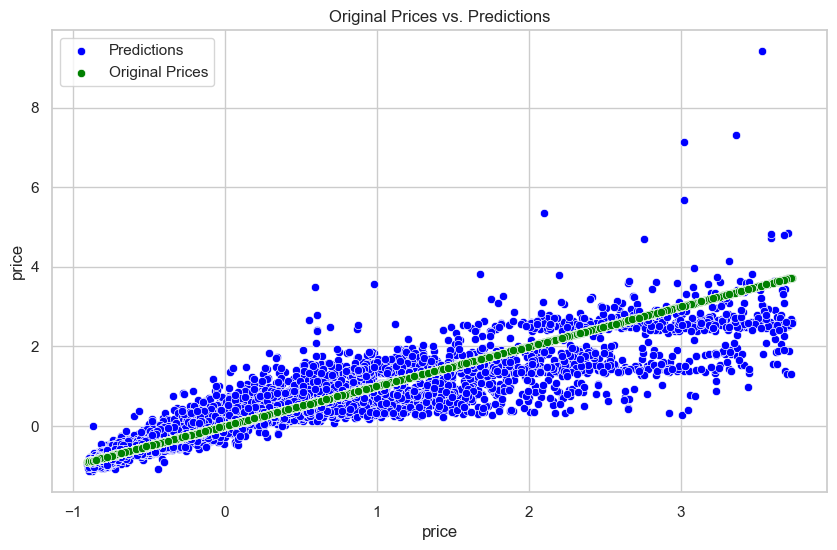

In [56]:
# Create a scatter plot with the original prices in red and predictions in blue
plt.figure(figsize=(10, 6))
# Plotting the scatter plot for predictions in blue
sns.scatterplot(x=data2['price'], y=predictions, color='blue', label='Predictions')

# Plotting the scatter plot for original prices in red
sns.scatterplot(x=data2['price'], y=data2['price'], color='green', label='Original Prices')


plt.title('Original Prices vs. Predictions')
plt.legend()
plt.show()

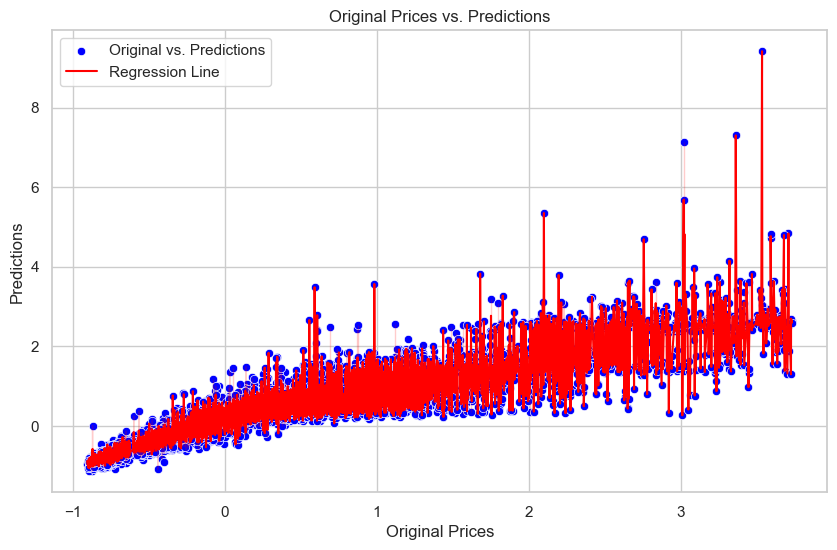

In [55]:
# Create a scatter plot with the original prices and predictions
plt.figure(figsize=(10, 6))

# Plotting the scatter plot
sns.scatterplot(x=data2['price'], y=predictions, color='blue', label='Original vs. Predictions')

# Plotting the regression line in red
sns.lineplot(x=data2['price'], y=predictions, color='red', label='Regression Line')

plt.title('Original Prices vs. Predictions')
plt.xlabel('Original Prices')
plt.ylabel('Predictions')

plt.legend()
plt.show()

## Test de fisher

In [66]:
from statsmodels.multivariate.manova import MANOVA


dependent_variable = data2[['carat', 'table', 'depth', 'x', 'y']]

# Fit the MANOVA model
manova_model = MANOVA(dependent_variable,data2['price'])

# Print MANOVA results
print(manova_model.mv_test())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
           x0           Value  Num DF   Den DF    F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda 0.1422 5.0000 10738.0000 12951.5521 0.0000
         Pillai's trace 0.8578 5.0000 10738.0000 12951.5521 0.0000
 Hotelling-Lawley trace 6.0307 5.0000 10738.0000 12951.5521 0.0000
    Roy's greatest root 6.0307 5.0000 10738.0000 12951.5521 0.0000



In [67]:
comp = statsmodels.stats.weightstats.CompareMeans( data2[['carat', 'table', 'depth', 'x', 'y']], data2['price'])

In [70]:
statsmodels.stats.weightstats.ttest_ind(data2[['carat', 'table', 'depth', 'x', 'y']], data2['price'])

(array([0.04925942, 0.93345443, 0.69808647, 0.31101849, 0.25518346]),
 array([0.96071302, 0.35059588, 0.48513067, 0.75578958, 0.79858385]),
 21484.0)

# Etude de correlation